In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
auth = pd.read_csv("D:\Fake News Datasate/LabeledAuthentic-7K.csv")
fake = pd.read_csv("D:\Fake News Datasate/Fake-2.5K - Fake-1K (1).csv")

In [3]:
auth.head()

,articleID,domain,date,category,source,relation,headline,content,label
0,1,bd-pratidin.com,2018-09-20 08:16:43,Sports,আফগান ক্রিকেট বোর্ড (এসিবি) প্রধান,Related,হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ,ক্রিকেট বিশ্বের নতুন চমকের নাম আফগানিস্তান। কয়...,1.0
1,2,jugantor.com,2018-09-20 20:20:20,Sports,Reporter,Related,টস হেরে বোলিংয়ে বাংলাদেশ,এশিয়া কাপের ষষ্ঠ ম্যাচে বাংলাদেশ দলের বিপক্ষে ...,1.0
2,3,bd24live.com,2018-09-20 16:39:40,National,Reporter,Related,রাজধানীতে বিশেষ অভিযানে আটক ৪৩,রাজধানীতে মাদক বিরোধী বিশেষ অভিযান পরিচালনা কর...,1.0
3,4,bd24live.com,2018-09-19 18:27:56,National,জননিরাপত্তা বিভাগের সচিব,Related,উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...,সনাতন ধর্মাবলম্বীদের সবচেয়ে বড় ধর্মীয় উৎসব দুর...,1.0
4,5,somoynews.tv,2018-09-20 10:15:28,Finance,পেট্রোল পাম্প মালিক সমিতি সভাপতি,Related,"'যেখানে তেল আসত ৭ দিনে, এখন তা আসবে অতি দ্রুত'",ভারত থেকে পাইপ লাইনের মাধ্যমে সরাসরি দেশে জ্বা...,1.0


In [4]:
fake.head()

,article ID,domain,date,category,headline,content,label
0,1,channeldhaka.news,2019-03-14T13:34:14+00:00,International,মুরগির হামলায় শেয়াল নিহত,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",0
1,2,earki.com,"সেম্বর ১৭, ২০১৮",Miscellaneous,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",0
2,3,earki.com,"২০:৩৯, জানুয়ারি ১৪, ২০১৯",Miscellaneous,বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,0
3,4,channeldhaka.news,2018-06-30T15:56:47+00:00,Sports,অবসর নেয়ার ঘোষণা দিলেন মেসি !,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,0
4,5,motikontho.wordpress.com,2013-03-05T21:55:45+00:00,Miscellaneous,"মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...","নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",0


# Exploratory Data Analysis

In [5]:
import matplotlib.pyplot as plt

def show_bar(column, title, top=100):
  plt.figure(figsize=(20,5))
  column[:top].plot(kind='bar')
  plt.title(title)
  plt.xlabel("ID")
  plt.ylabel("Count")
  plt.show()

import seaborn as sns

def show_dist(column):
  plt.figure(figsize=(10,5))
  sns.distplot(column)
  plt.show()

# Compare Headline Length and Content Length

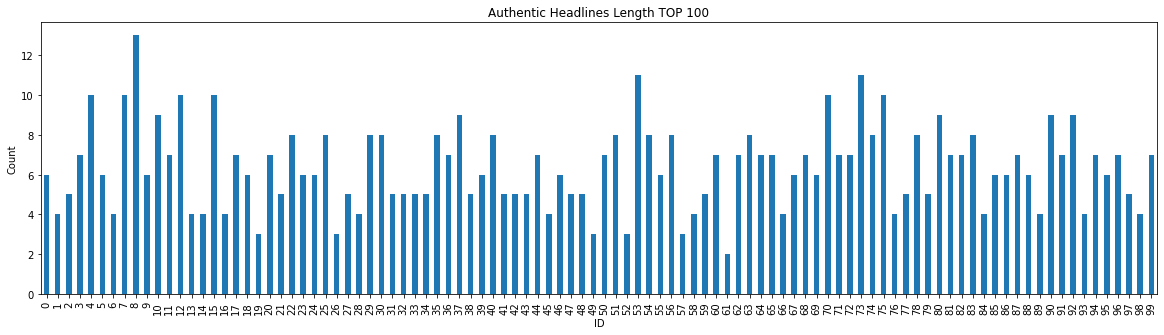

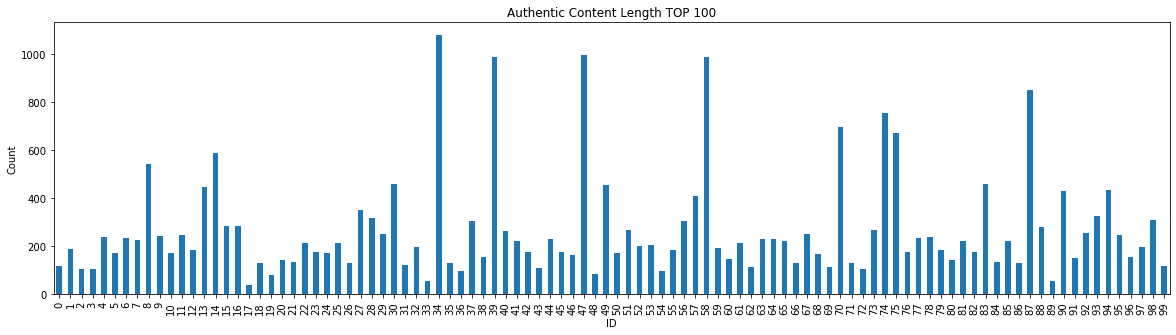

In [6]:
auth['head_lenght'] = auth.headline.apply(lambda x : len(x.split()))
auth['content_head_lenght'] = auth.content.apply(lambda x : len(x.split()))


show_bar(auth.head_lenght, "Authentic Headlines Length TOP 100")
print("")
show_bar(auth.content_head_lenght, "Authentic Content Length TOP 100")

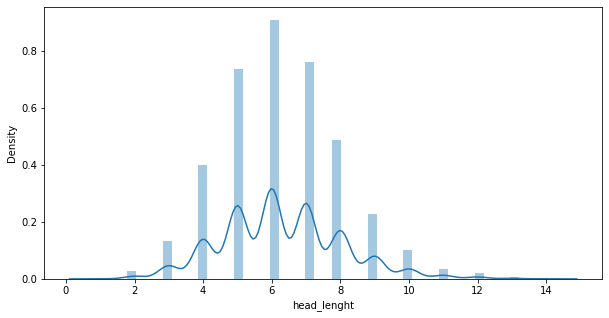

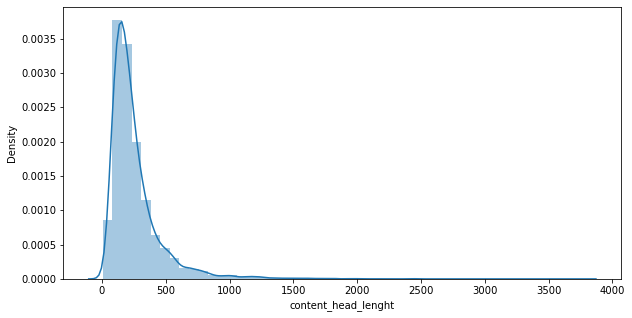

In [7]:
show_dist(auth.head_lenght)
print("")
show_dist(auth.content_head_lenght)

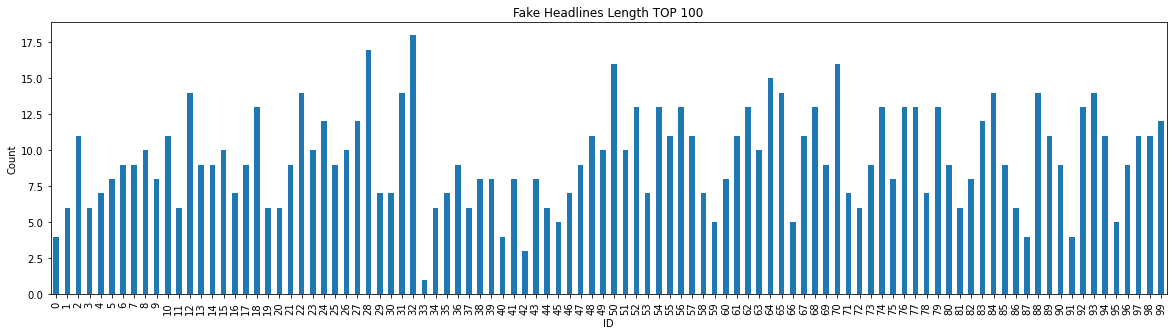

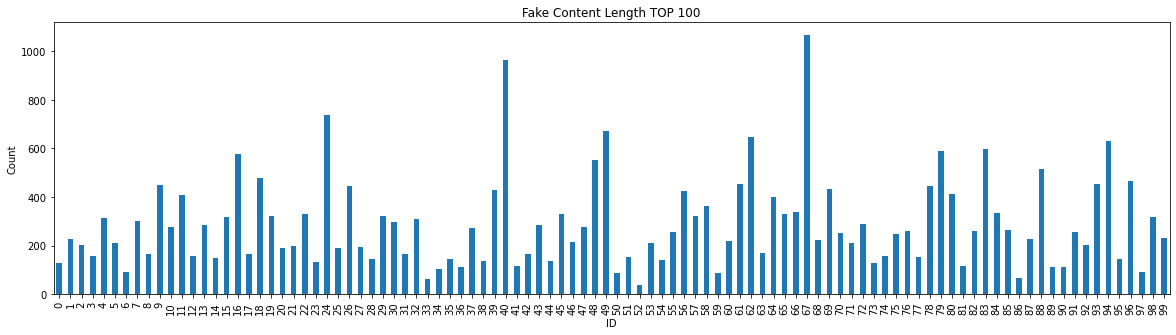

In [8]:
fake['head_lenght'] = fake.headline.apply(lambda x : len(x.split()))
fake['content_head_lenght'] = fake.content.apply(lambda x : len(x.split()))

show_bar(fake.head_lenght, "Fake Headlines Length TOP 100")
print("")
show_bar(fake.content_head_lenght, "Fake Content Length TOP 100")

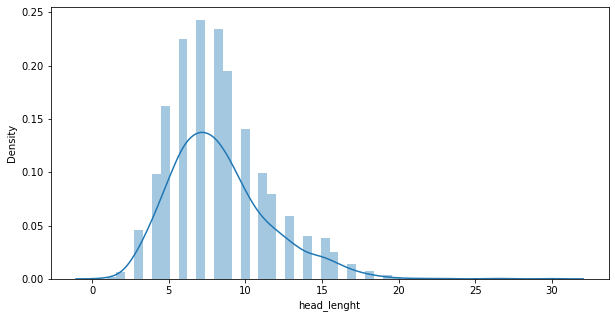

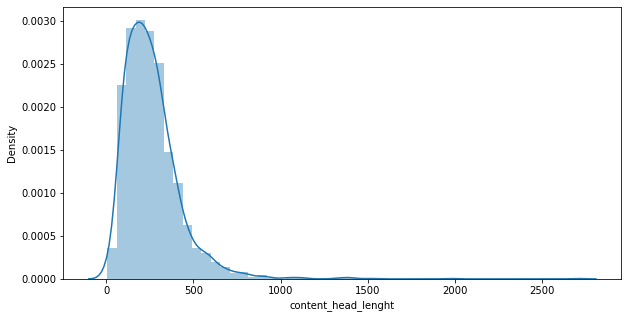

In [9]:
show_dist(fake.head_lenght)
print("")
show_dist(fake.content_head_lenght)

In [10]:
# Distribution graphs (histogram/bar graph) of column data
import numpy as np
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [11]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

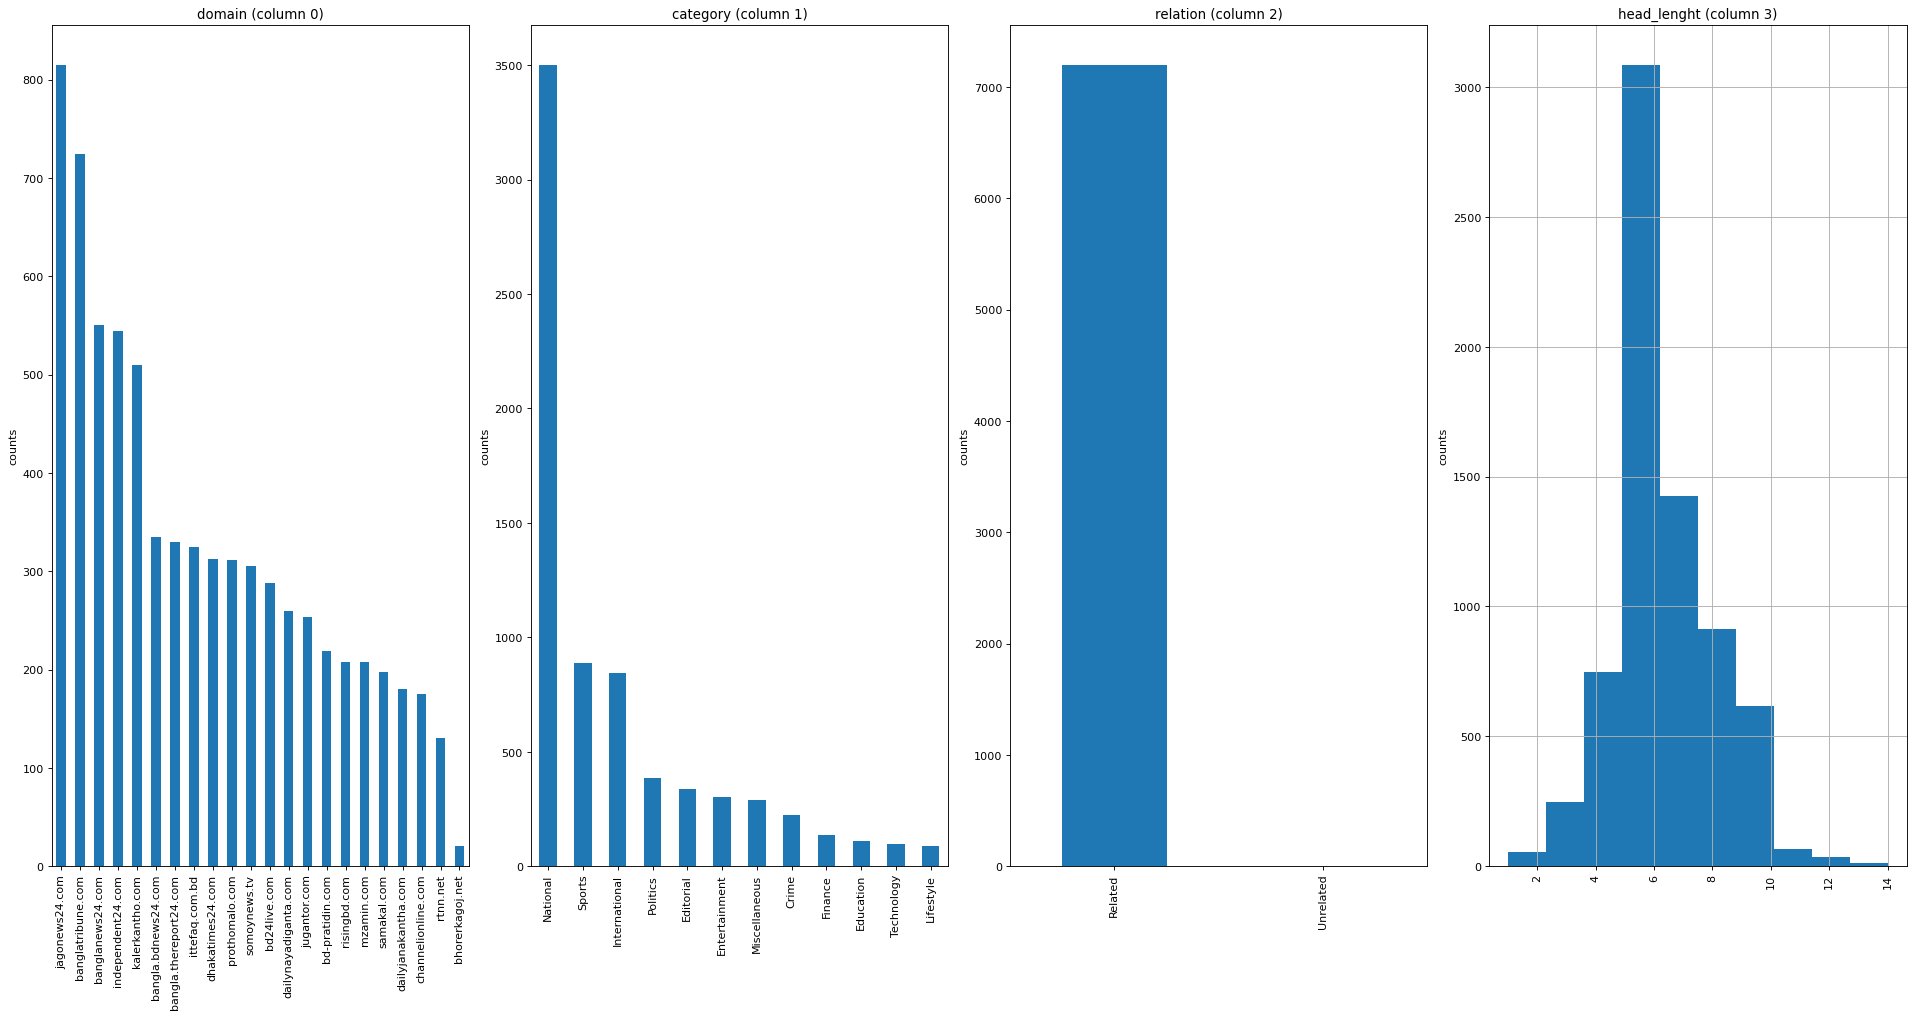

In [12]:
plotPerColumnDistribution(auth, 10, 5)

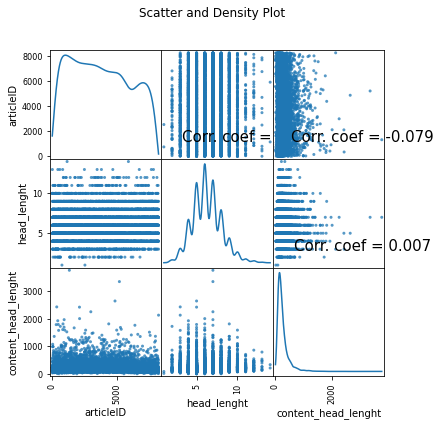

In [13]:
plotScatterMatrix(auth, 6, 15)

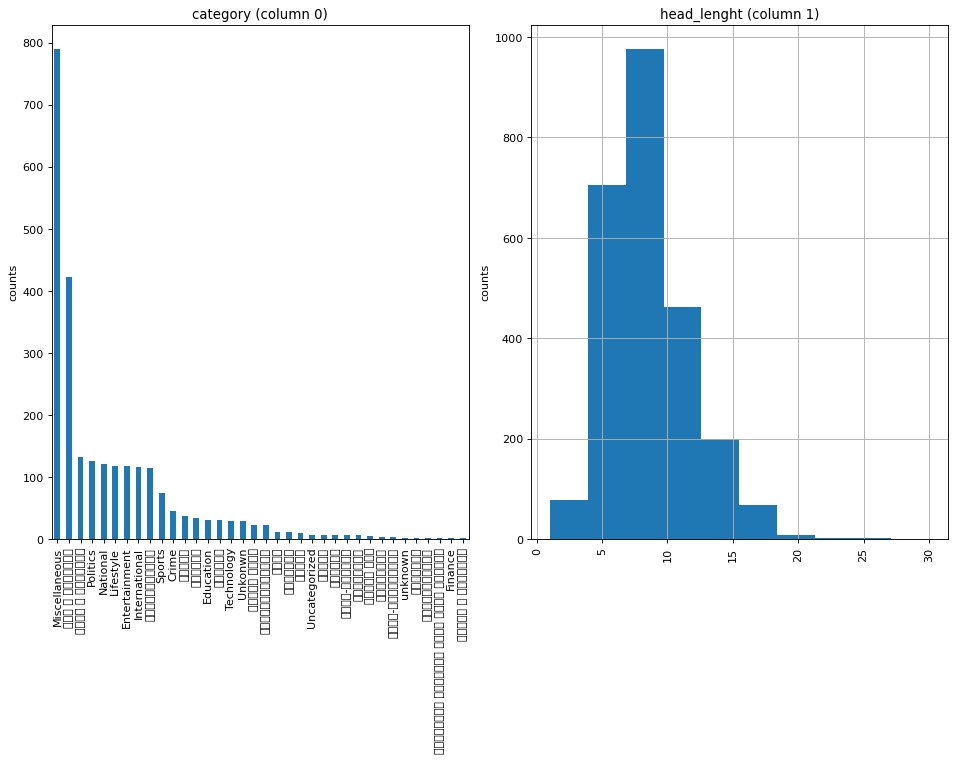

In [14]:
plotPerColumnDistribution(fake, 10, 5)

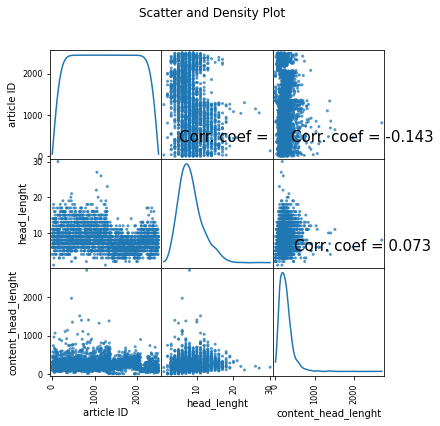

In [15]:
plotScatterMatrix(fake, 6, 15)

# Word Cloud

In [16]:
!wget https://www.easynepalityping.com/resource/font/bangla/06-nikosh-bangla-font.zip

--2022-08-26 15:35:02--  https://www.easynepalityping.com/resource/font/bangla/06-nikosh-bangla-font.zip
Resolving www.easynepalityping.com (www.easynepalityping.com)... 104.21.11.66, 172.67.165.83
Connecting to www.easynepalityping.com (www.easynepalityping.com)|104.21.11.66|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 317905 (310K) [application/zip]
Saving to: '06-nikosh-bangla-font.zip.9'

     0K .......... .......... .......... .......... .......... 16% 3.58M 0s
    50K .......... .......... .......... .......... .......... 32%  612K 0s
   100K .......... .......... .......... .......... .......... 48% 2.99M 0s
   150K .......... .......... .......... .......... .......... 64%  664K 0s
   200K .......... .......... .......... .......... .......... 80% 3.24M 0s
   250K .......... .......... .......... .......... .......... 96% 3.82M 0s
   300K ..........                                            100% 10.7M=0.2s

2022-08-26 15:35:03 (1.41 MB/s) - '06-ni

In [17]:
import zipfile
with zipfile. ZipFile("06-nikosh-bangla-font.zip","r") as zip_ref:
 zip_ref.extractall()

In [18]:
from wordcloud import WordCloud, STOPWORDS

def plot_world(text):

    wordcloud = WordCloud(width = 500, height = 500, 
                    background_color ='black', 
                    font_path="Nikosh.ttf",
                    min_font_size = 10).generate(text) 

    # plot the WordCloud image                        
    plt.figure(figsize = (5, 5), facecolor = 'k', edgecolor = 'k' ) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()

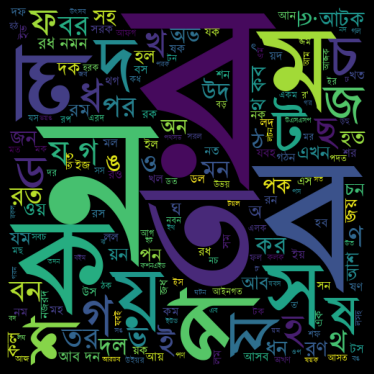

In [19]:
s= " ".join(auth.headline[:100])
plot_world(s)

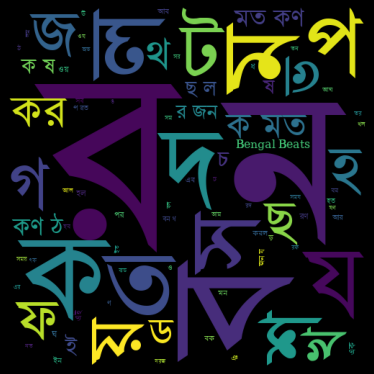

In [20]:
s= " ".join(fake.headline[:100])
plot_world(s)

# Analysis Words

In [21]:
!pip install bnlp_toolkit

In [22]:
from bnlp import BasicTokenizer
tokenizer = BasicTokenizer()

s = """আমি বাংলায় গান গাই
    আমি বাংলার গান গাই।
    আমি আমার আমিকে চিরদিন
    এই বাংলায় খুঁজে পাই।"""

print(tokenizer.tokenize(s))

['আমি', 'বাংলায়', 'গান', 'গাই', 'আমি', 'বাংলার', 'গান', 'গাই', '।', 'আমি', 'আমার', 'আমিকে', 'চিরদিন', 'এই', 'বাংলায়', 'খুঁজে', 'পাই', '।']


In [23]:
def create_corpus(texts):
    corpus=[]

    for txt in texts:
      tokens = tokenizer.tokenize(txt)
      corpus.extend(tokens)

    return corpus

In [24]:
auth_corpus = create_corpus(auth.headline[:2500])
print("Total auth tokens in 2500", len(auth_corpus))

fake_corpus = create_corpus(fake.headline[:2500])
print("Total auth tokens in 2500", len(fake_corpus))

Total auth tokens in 2500 17578
Total auth tokens in 2500 22635


In [25]:
from matplotlib import font_manager
# set font
font_manager.fontManager.addfont("Nikosh.ttf")
plt.rcParams['font.family'] = 'Nikosh'
plt.rcParams['font.sans-serif']=['Nikosh']
plt.rcParams['axes.unicode_minus']=False

In [26]:
from collections import defaultdict
from collections import  Counter
from bnlp.corpus import stopwords
import matplotlib.font_manager as fm

def show_stop_words(corpus, length=20):
  dic = defaultdict(int)

  for word in corpus:
      if word in stopwords:
        dic[word]+=2
          

  top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:length]
  x,y=zip(*top)
  print(x)
  print(y)
  plt.figure(figsize=(10,5))
  plt.bar(x,y)
  plt.show()

('না', 'ও', 'থেকে', 'নিয়ে', 'হবে', 'দুই', 'সঙ্গে', 'শুরু', 'করে', 'হচ্ছে', 'পর', 'নতুন', 'জন্য', 'করতে', 'নেই', 'র', 'আজ', 'নয়', 'কাছে', 'কোটি')
(210, 162, 130, 128, 104, 104, 102, 98, 92, 78, 74, 72, 68, 68, 68, 64, 50, 48, 46, 44)


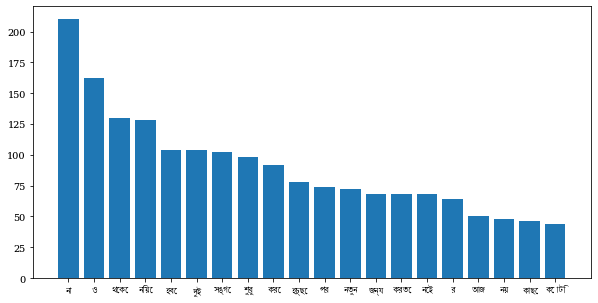

In [27]:
show_stop_words(auth_corpus)

('না', 'ও', 'করে', 'যে', 'করলেন', 'নিয়ে', 'জন্য', 'থেকে', 'দিলেন', 'করতে', 'এবার', 'করা', 'কি', 'হবে', 'এই', 'আমার', 'পর', 'যা', 'দুই', 'আমি')
(428, 184, 170, 160, 152, 122, 120, 116, 116, 102, 100, 98, 94, 92, 92, 92, 76, 72, 70, 62)


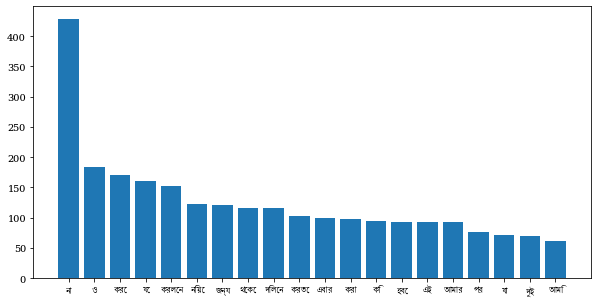

In [28]:
show_stop_words(fake_corpus)

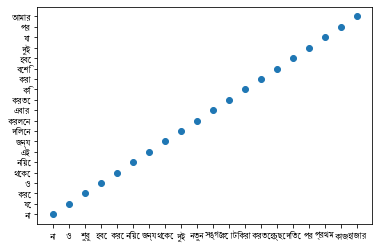

In [29]:
import matplotlib.pyplot as plt

x = ['না', 'ও', 'শুরু', 'হবে', 'করে', 'নিয়ে', 'জন্য', 'থেকে', 'দুই', 'নতুন', 'সঙ্গে', 'কোটি', 'করা', 'করতে', 'হচ্ছে', 'দিতে', 'পর', 'প্রথম', 'কাজ', 'হাজার']
y = ['না', 'যে', 'করে', 'ও', 'থেকে', 'নিয়ে', 'এই', 'জন্য', 'দিলেন', 'করলেন', 'এবার', 'করতে', 'কি', 'করা', 'বেশি', 'হবে', 'দুই', 'যা', 'পর', 'আমার']

plt.scatter(x, y)
plt.show()

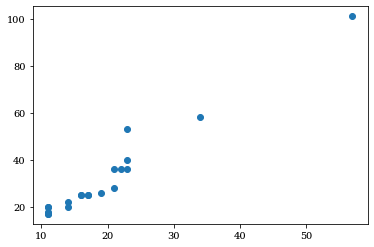

In [30]:
import matplotlib.pyplot as plt

x = [57, 34, 23, 23, 23, 22, 21, 21, 19, 17, 17, 16, 16, 14, 14, 11, 11, 11, 11, 11]
y = [101, 58, 53, 40, 36, 36, 36, 28, 26, 25, 25, 25, 25, 22, 20, 20, 20, 18, 17, 17]

plt.scatter(x, y)
plt.show()


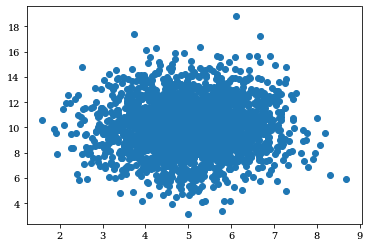

In [31]:
import numpy
import matplotlib.pyplot as plt

x = numpy.random.normal(5.0, 1.0, 2500)
y = numpy.random.normal(10.0, 2.0, 2500)


plt.scatter(x, y)
plt.show()

In [32]:
from bnlp.corpus import stopwords, punctuations, digits

def filters(corpus):
  res = []
  for i in corpus:
    if i in stopwords:
      continue

    if i in punctuations + '‘' + '’':
      continue

    if i in digits:
      continue

    res.append(i)

  return res

In [33]:
auth_corpus_filtered = filters(auth_corpus)
fake_corpus_filtered = filters(fake_corpus)

In [34]:
def get_top_words(corpus):
  dic = defaultdict(int)

  for word in corpus:
      dic[word] +=1

  top = sorted(dic.items(), key=lambda x:x[1],reverse=True)
  x,y=zip(*top)
  return x, y

In [35]:
x, y = get_top_words(auth_corpus_filtered)

print("Top 10 words")
print(x[:10])
print(y[:10]) 

Top 10 words
('বাংলাদেশ', 'নিহত', 'সেপ্টেম্বর', '২০১৮', 'মৃত্যু', 'বিএনপি', 'আটক', 'বাংলাদেশের', 'প্রধানমন্ত্রী', 'উদ্ধার')
(81, 80, 67, 57, 56, 55, 51, 43, 42, 42)


In [36]:
x, y = get_top_words(fake_corpus_filtered)

print("Top 10 words")
print(x[:10])
print(y[:10])

Top 10 words
('দৈনিক', 'মতিকণ্ঠ', 'Bengal', 'Beats', 'এক', 'হয়ে', 'খালেদা', 'সাথে', 'দিয়ে', 'বিএনপি')
(193, 192, 180, 180, 75, 48, 43, 42, 39, 39)


# Classify News

In [37]:
import import_ipynb

import time

import numpy as np

import pandas as pd
import torch
import torch.nn as nn
from torch.optim import AdamW
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from tqdm.notebook import tqdm
from transformers import BertModel, BertTokenizer, BertForSequenceClassification

# Prepare Datasets

In [38]:
class NewsDatasets(Dataset):
    def __init__(self, data, max_length=100):
        self.data = data
        
        self.config = {
            "max_length": max_length,
            "padding": "max_length",
            "return_tensors": "pt",
            "truncation": True,
            "add_special_tokens": True
        }

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        value = self.data.iloc[idx]
        return value['head']+"[SEP]"+value['con'] , value['label']

In [39]:
auth = pd.read_csv("D:\Fake News Datasate/Authentic-48K.csv")
fake = pd.read_csv("D:\Fake News Datasate/Fake-2.5K - Fake-1K (1).csv")

df = auth[:fake.shape[0]* 7]
df = df.append(fake)
df = df.sample(frac=1).reset_index(drop=True)
len(df)

20000

In [40]:
from bnlp import BasicTokenizer
from bnlp.corpus import stopwords, punctuations, letters, digits

btokenizer = BasicTokenizer()

def clean_text(text):
    tokens = btokenizer.tokenize(text)
    filtered = []
    for i in tokens:
        if i in stopwords:
            continue
    
        if i in punctuations + '‘' + '’':
            continue
    
        filtered.append(i)
    
    return " ".join(filtered)

print("********** Before ***************")
text = df.iloc[1]['content']
print(text)
print("\n********** After ***************")
print(clean_text(text))

********** Before ***************
রুমমেটের পেস্ট চুরি করা নিয়ে কথাকাটাকাটি নিয়ে ঘটনার সূত্রপাত, এক পর্যায়ে সংঘর্ষ বেধে গেলে আহত হয় ৬ মেস মেম্বার। যারা ফার্মগেটের আশেপাশে কলেজ ভার্সিটিতে পড়ে। কিভাবে এই ঘটনা ঘটলো সেটা জানতে চাইলে নাম প্রকাশে অনিচ্ছুক মেসের বুয়া আমাদের বিস্তারিত জানান।বুয়া বলেন- অনেকদিন যাবত তিন রুমের ফ্লাটে মেস করে ১৩ জন ছাত্র এখানে থাকেন। বেশকিছুদিন ধরে রমেশ নামে এক মেস মেম্বার অভিযোগ করে আসছিলো, তার ক্লোজআপের পাতা দশ দিনেই শেষ হয়ে যাচ্ছে। নিশ্চয়ই কেউ চুরি করে পাতা থেকে পেস্ট ব্যাবহার করে।এই ঘটনা নিয়ে আজকে মেসে বিচার বসে। রমেশের রুমমেটরা অভিযোগ তোলে পাশের রুমের কবির, ছাব্বির, মামুন, মুস্তাফিজুর, মুসাদ্দেক, টনি, মিঠুন, টগর, সাদিকের উপর। এ সময় কথাকাটাকাটি হয়। এর এক পর্যায়ে সংঘর্ষ বেধে যায়। আর এতেই আহত হয় সব মেস মেম্বার। পরবর্তীতে বুয়ার হস্তক্ষেপে সবাই শান্ত হন।তবে এখনো মেসে উত্তেজনা বিরাজ করছে। আমরা প্রায় সব মেম্বারের সাথেই যোগাযোগ করার চেষ্টা করেছি, তবে এ ব্যপারে কেউ মুখ খোলেনি।আবারো পড়ুন ভালো লাগলে –রুমমেটের পেস্ট চুরি করা নিয়ে কথাকাটাকাটি নিয়ে ঘটনার সূত্রপাত, এক পর্যায়

In [41]:
df['head'] = df.headline.apply(clean_text)
df['con'] = df.content.apply(clean_text)

In [42]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=121, stratify=df['label'])


In [43]:
len(train_df), len(test_df)

(16000, 4000)

In [44]:
training_data = NewsDatasets(train_df)
train_dataloader = DataLoader(training_data, batch_size=16, shuffle=True)

In [45]:
test_data = NewsDatasets(test_df)
test_dataloader = DataLoader(test_data, batch_size=16, shuffle=True)

# Define Model

In [46]:
class NewsBert(nn.Module):

    def __init__(self, bert):
        super(NewsBert, self).__init__()

        self.bert = bert

        
        self.dropout = nn.Dropout(0.2)

        
        self.relu = nn.ReLU()

        
        self.fc1 = nn.Linear(768, 128)

        
        self.fc2 = nn.Linear(128, 2)  

    
    def forward(self, input_ids, token_type_ids, attention_mask):
        
        out = self.bert(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)

        x = self.fc1(out[1])
        x = self.relu(x)
        
        x = self.fc2(self.dropout(x))
        
        return x

In [47]:
bert_model_name = "sagorsarker/bangla-bert-base"
bert = BertModel.from_pretrained(bert_model_name)
tokenizer = BertTokenizer.from_pretrained(bert_model_name)

Some weights of the model checkpoint at sagorsarker/bangla-bert-base were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [48]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NewsBert(bert)
model.to(device);

In [49]:
s = "আমি বাংলায় গান গাই। [SEP]"
t = tokenizer.encode_plus(s, return_tensors="pt").to(device)
print(t)
out = model(**t)
print(out)

{'input_ids': tensor([[  101,  2169,  2492,  9294,  2552, 13985,  1014,   102,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]])}
tensor([[-0.1000,  0.1974]], grad_fn=<AddmmBackward0>)


In [50]:
from torch.optim.lr_scheduler import StepLR

optimizer = AdamW(model.parameters(), lr=1e-5)
criterion = nn.CrossEntropyLoss()
scheduler = StepLR(optimizer, step_size=2, gamma=0.1)

# Train

In [51]:
def train(model, dataloader, optimizer, criterion, config):
    model.train()  
    train_loss = 0
    for batch in tqdm(dataloader):
        text, labels = batch

        model.zero_grad()

        inputs = tokenizer.batch_encode_plus(
            text, **config
        )
        input_ids = inputs['input_ids'].to(device)
        token_type_ids = inputs['token_type_ids'].to(device)
        attention_mask = inputs['attention_mask'].to(device)
        labels = labels.to(device)

        
        logs = model(token_type_ids=token_type_ids, input_ids=input_ids, attention_mask=attention_mask)

        loss = criterion(logs, labels)
        train_loss += loss.item() * input_ids.size(0)
        loss.backward()

        
        nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

    return train_loss

In [52]:
def evaluate(model, dataloader, criterion, config):
    total = 0
    correct = 0
    valid_loss = 0.0

    model.eval()  
    for batch in dataloader:
        text, labels = batch
        inputs = tokenizer.batch_encode_plus(
            text, **config
        )
        input_ids = inputs['input_ids'].to(device)
        token_type_ids = inputs['token_type_ids'].to(device)
        attention_mask = inputs['attention_mask'].to(device)
        labels = labels.to(device)

        
        output = model(token_type_ids=token_type_ids, input_ids=input_ids, attention_mask=attention_mask)

        loss_p = criterion(output, labels)
        
        valid_loss += loss_p.item() * input_ids.size(0)
        
        proba = torch.exp(output)
        top_p, top_class = proba.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        

        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    return total, correct, valid_loss

In [53]:
epochs = 5
tokenizer_config = {
    "max_length": 100,
    "padding": "max_length",
    "return_tensors": "pt",
    "truncation": True,
    "add_special_tokens": True
}

In [54]:
train_loss_data, valid_loss_data = [], []
valid_loss_min = np.Inf
since = time.time()
best_loss = np.inf

for epoch in range(epochs):
    print("Epoch: {}/{}".format(epoch + 1, epochs))
    
    train_loss = 0.0
    valid_loss = 0.0
    total = 0
    correct = 0
    e_since = time.time()

    
    train_loss += train(model, train_dataloader, optimizer, criterion, tokenizer_config)
    
    out = evaluate(model, test_dataloader, criterion, tokenizer_config)
    total += out[0]
    correct += out[1]
    valid_loss += out[2]
    
    scheduler.step()

    
    train_loss = train_loss / len(train_dataloader.dataset)
    valid_loss = valid_loss / len(test_dataloader.dataset)

    
    train_loss_data.append(train_loss * 100)
    valid_loss_data.append(valid_loss * 100)
    
    if valid_loss < best_loss:
        best_loss = valid_loss
        torch.save(model.state_dict(), "news_model1.pth")

    print("\tTrain loss:{:.6f}..".format(train_loss),
          "\tValid Loss:{:.6f}..".format(valid_loss),
          "\tAccuracy: {:.4f}".format(correct / total * 100))

time_elapsed = time.time() - since
print('Training completed in {:.0f}m {:.0f}s'.format(
    time_elapsed // 60, time_elapsed % 60))

Epoch: 1/5


  0%|          | 0/1000 [00:00<?, ?it/s]

	Train loss:0.220715.. 	Valid Loss:0.311699.. 	Accuracy: 92.4750
Epoch: 2/5


  0%|          | 0/1000 [00:00<?, ?it/s]

	Train loss:0.119877.. 	Valid Loss:0.136940.. 	Accuracy: 96.0500
Epoch: 3/5


  0%|          | 0/1000 [00:00<?, ?it/s]

	Train loss:0.041250.. 	Valid Loss:0.162238.. 	Accuracy: 96.8250
Epoch: 4/5


  0%|          | 0/1000 [00:00<?, ?it/s]

	Train loss:0.032320.. 	Valid Loss:0.155329.. 	Accuracy: 97.1250
Epoch: 5/5


  0%|          | 0/1000 [00:00<?, ?it/s]

	Train loss:0.025306.. 	Valid Loss:0.149272.. 	Accuracy: 97.2250
Training completed in 1140m 57s


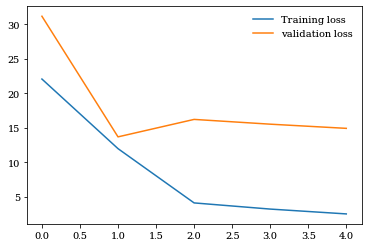

In [55]:
from matplotlib import pyplot as plt

plt.plot(train_loss_data, label="Training loss")
plt.plot(valid_loss_data, label="validation loss")
plt.legend(frameon=False)

# Testing

In [56]:
model.load_state_dict(torch.load("./news_model1.pth", map_location = device))

<All keys matched successfully>

In [57]:
all_preds = []
all_labels = []

for batch in test_dataloader:
    text, labels = batch
    inputs = tokenizer.batch_encode_plus(
        text, **tokenizer_config
    )
    input_ids = inputs['input_ids'].to(device)
    token_type_ids = inputs['token_type_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)
    labels = labels.to(device)

    
    output = model(token_type_ids=token_type_ids, input_ids=input_ids, attention_mask=attention_mask)
    preds = output.detach().cpu().numpy()
    preds = np.argmax(preds, axis = 1)
    all_preds.extend(preds)
    all_labels.extend(labels.cpu().numpy())

In [58]:
from sklearn.metrics import classification_report

print(classification_report(all_labels, all_preds))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       500
           1       0.98      0.97      0.98      3500

    accuracy                           0.96      4000
   macro avg       0.90      0.93      0.91      4000
weighted avg       0.96      0.96      0.96      4000

